## Quantum simulation of the Schrödinger equation for a free particle in a step potential V(x)

The essence of performing a quantum simulation is to be able to predict the final state of a quantum system given its initial state. In this project, a quantum simulation using Qiskit has been developed to describe the dynamics of a quantum state influenced by the step potential.

Reference:

[1] Abouelela, Mohamed, "Quantum Simulation of the Schrodinger Equation using IBM's Quantum Computers" (2020). Capstone and Graduation Projects. 20.
https://fount.aucegypt.edu/capstone/20

[2] Benenti, G., & Strini, G. (2008). Quantum simulation of the single-particle Schrödinger equation. American Journal of Physics, 76(7), 657–662. doi:10.1119/1.2894532 


In [37]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit,execute, transpile, Aer, IBMQ,ClassicalRegister, QuantumRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library.standard_gates.p import PhaseGate
import matplotlib.pyplot as plt

In [39]:

x = np.linspace(-0.5,3,16)
sigma =0.4
u = 0
psi = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-1/2*((x - u)/sigma)**2)*np.exp(300j*x)
constante_norm = np.sqrt(np.sum(np.abs(psi**2)))
psi_norm = psi/constante_norm


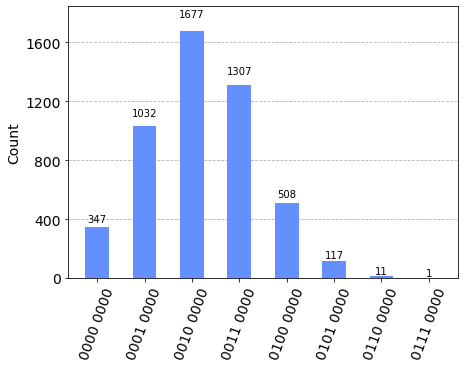

In [40]:
num_q = 4
num_c = 4

#Initial state

init_state = QuantumCircuit(num_q,num_c)
init_state.initialize(psi_norm,[0,1,2,3])
init_state.measure_all()
ae = Aer.get_backend("qasm_simulator")
results = execute(init_state,backend = ae,shots = 5000).result()
count = results.get_counts()
plot_histogram([count])

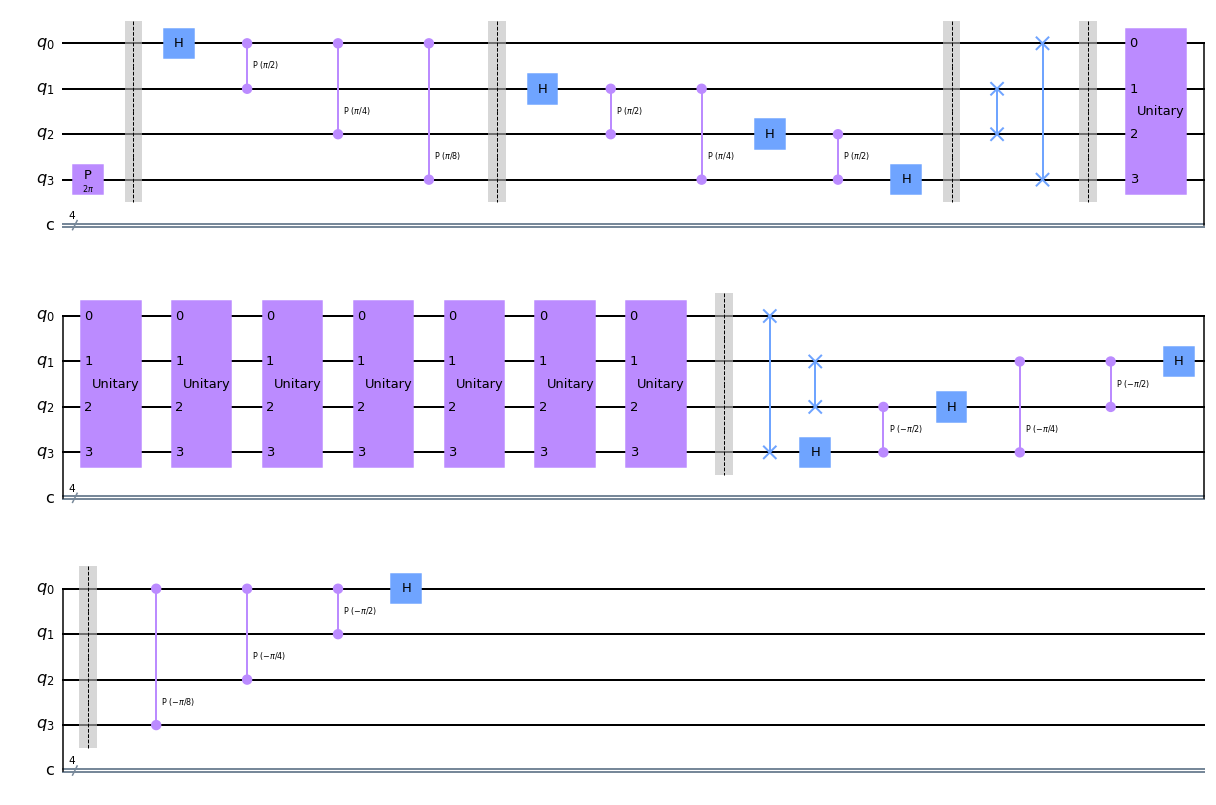

In [41]:
num_q = 4
num_c = 4

init_state = QuantumCircuit(num_q,num_c)
l = 0

for l in range(2):
    init_state.initialize(psi_norm,[0,1,2,3])

phi = np.pi

#Potencial
V = 2
qc = QuantumCircuit(num_q,num_c)
qc.p(V*np.pi,3)
qc.barrier()
            
#QFT
qc.h(0)
qc.cp(np.pi/2,1,0)
qc.cp(np.pi/4,2,0)
qc.cp(np.pi/8,3,0)
qc.barrier()
qc.h(1)
qc.cp(np.pi/2,2,1)
qc.cp(np.pi/4,3,1)
qc.h(2)
qc.cp(np.pi/2,3,2)
qc.h(3)
qc.barrier()
qc.swap(1,2)
qc.swap(0,3)


qc.barrier()

#momentum
#F0
u0 = [[np.exp(1j*0), 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,np.exp(1j*np.pi),0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]

#F1
u1 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,np.exp(2j*np.pi),0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,np.exp(3j*np.pi),0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]

#F2
u2 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,np.exp(4j*np.pi),0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,np.exp(5j*np.pi),0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]

#F3
u3 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,np.exp(6j*np.pi), 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, np.exp(7j*np.pi),0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]
#F4
u4 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,np.exp(8j*np.pi),0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,np.exp(9j*np.pi),0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]
#F5
u5 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,np.exp(10j*np.pi),0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,np.exp(11j*np.pi),0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]

#F6
u6 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,np.exp(12j*np.pi),0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,np.exp(13j*np.pi),0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1]]

#F7
u7 = [[1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0, 0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,np.exp(14j*np.pi),0],
    [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,np.exp(15j*np.pi)]]

qc.unitary(u0,[0,1,2,3])
qc.unitary(u1,[0,1,2,3])
qc.unitary(u2,[0,1,2,3])
qc.unitary(u3,[0,1,2,3])
qc.unitary(u4,[0,1,2,3])
qc.unitary(u5,[0,1,2,3])
qc.unitary(u6,[0,1,2,3])
qc.unitary(u7,[0,1,2,3])
    
qc.barrier()
#inverse QFT
qc.swap(0,3)
qc.swap(1,2)
qc.h(3)
qc.cp(-np.pi/2,3,2)
qc.h(2)
qc.cp(-np.pi/4,3,1)
qc.cp(-np.pi/2,2,1)
qc.h(1)
qc.barrier()
qc.cp(-np.pi/8,3,0)
qc.cp(-np.pi/4,2,0)
qc.cp(-np.pi/2,1,0)
qc.h(0)

for i in range(l):
    init_state.append(qc,[0,1,2,3],[0,1,2,3])

for k in range(4):
    init_state.measure(k,k)

qc.draw("mpl")

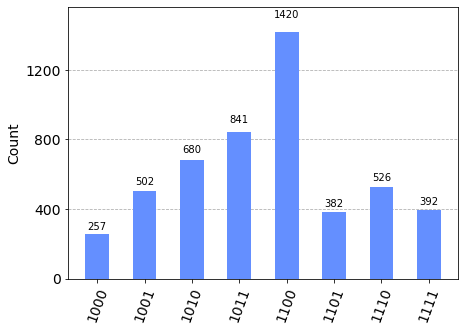

In [42]:
ae = Aer.get_backend("qasm_simulator")
results = execute(init_state,backend = ae,shots = 5000).result()
count = results.get_counts()
plot_histogram([count])